In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics


from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn import datasets 

from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error  #  'neg_mean_squared_error'
from sklearn.metrics import r2_score

In [2]:
# load the boston data, sklearn.utils.Buncn type data 
data = datasets.load_boston()
# print (data.DESCR)

In [3]:
colnames = list(data.feature_names)
len(colnames)

13

In [4]:
price = pd.DataFrame(data.target)
print (type(price))
price.shape

<class 'pandas.core.frame.DataFrame'>


(506, 1)

In [5]:
x = pd.DataFrame(data.data)
# rename colnames
x.columns = colnames 
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


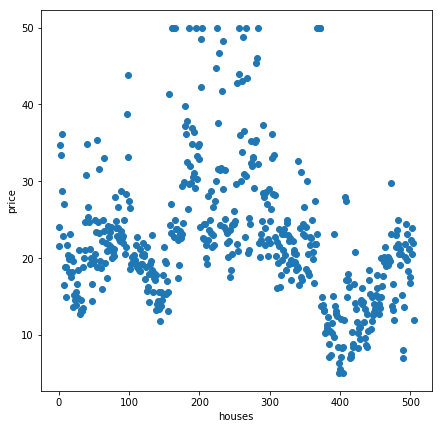

In [6]:
fig = plt.figure(figsize = (7, 7))

plt.scatter(list(x.index), price)
plt.xlabel('houses')
plt.ylabel('price')

plt.show()

In [7]:
# train test split, which also has the shuffle parameter, by default shuffle = True
x_train, x_test, y_train, y_test = train_test_split(x, price, test_size = 0.2, random_state = 0)


In [8]:
# meaning of random state in RF here - control the randomness in feature subset selection at each split  

regr = RandomForestRegressor(random_state = 0)
regr.fit(x_train, y_train)

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [9]:
# coefficient of determination R^2 of the prediction
regr.score(x_test, y_test)

0.72343677437330189

In [10]:
# definition of coefficient of determination
1 - sum((np.ravel(y_test) - regr.predict(x_test)) **2) /sum((np.ravel(y_test) - np.ravel(y_test).mean()) ** 2)

0.72343677437330212

In [11]:
# help(regr.score)

In [12]:
# # KFold in splitting data, by default shuffle = False
# from sklearn.model_selection import KFold 
# # Provides train/test indices to split data in train/test sets.(without shuffling by default).

# # Whether to shuffle the data before splitting into batches.
# kf = KFold(n_splits = 2, random_state = 0)
# print (kf.get_n_splits(x))

# for train_index, test_index in kf.split(x):
#     print('TRAIN:' ,train_index, 'TEST:' , test_index)

# x_train, x_test, y_train, y_test = x[train_index], x[test_index], price[train_index], price[test_index]

In [13]:
# print (train_index.shape)
# print (test_index.shape)

# print (train_index.shape == test_index.shape)

## Cross Validation in expected testing error estimation

### sklearn.model_selection. cross_val_score
### self-defiend MSE in self-defined MSE
### sklearn.model_selection. ShuffleSplit

The cross_validate function differs from cross_val_score in two ways 
- It allows specifying multiple metrics for evaluation.
- It returns a dict containing training scores, fit-times and score-times in addition to the test score.

Random Initialization
Some cross validation iterators, such as KFold, have an inbuilt option to shuffle the data indices before splitting them. Note that:
- This consumes less memory than shuffling the data directly.
- By default no shuffling occurs, including for the (stratified) K fold cross- validation performed by specifying cv=some_integer to cross_val_score, grid search, etc. Keep in mind that train_test_split still returns a random split.
- The random_state parameter defaults to None, meaning that the shuffling will be different every time KFold(..., shuffle=True) is iterated. However, GridSearchCV will use the same shuffling for each set of parameters validated by a single call to its fit method.
- To get identical results for each split, set random_state to an integer.

#### model_selection.cross_val_score

In [30]:
regr = RandomForestRegressor(random_state = 0)
regr.fit(x_train, y_train)

# it wants np array as y 
# CV in estimating EXPECTED testing error 

k = int(x.shape[0] /2)
scores = cross_val_score(regr, x, np.ravel(price), cv = k, scoring = 'neg_mean_squared_error')

# the neagtive coefficients of correlation indicates that the model couldn't even outperform predicting the mean all the time
# print (scores)
scores.mean()

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


-13.391359090909091

In [15]:
# help(cross_val_score)

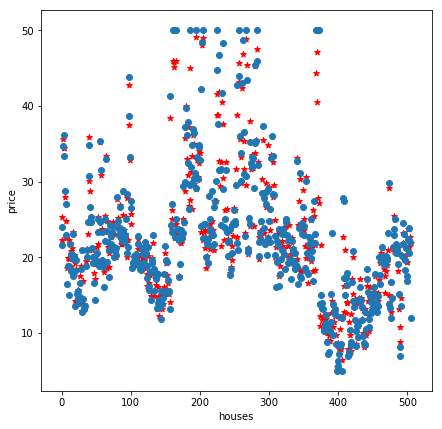

In [16]:
fig = plt.figure(figsize = (7, 7))

fig.add_subplot(1, 1, 1)
plt.scatter(list(x.index), y = regr.predict(x), color = 'r', marker = '*')

plt.scatter(list(x.index), price)
plt.xlabel('houses')
plt.ylabel('price')

plt.show()

In [43]:
#### model_selection.cross_validate

### CV Folds and leanring curve 

too large the K could lead to overestimation of the EXPECTED testing error as training set inclues most of the sample data available 
the large K could also leads to higher run time and  higher varince 
when the slope of learning curve is flat for 90% of the data, it's ok to ignore the bias and use k = 10

A learning curve shows the validation and training score of an estimator for varying numbers of training samples. It is a tool to find out how much we benefit from adding more training data and whether the estimator suffers more from a variance error or a bias error. If both the validation score and the training score converge to a value that is too low with increasing size of the training set, we will not benefit much from more training data.

In [17]:
# Learning Curve - Determines cross-validated training and test scores for different training set sizes

from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


In [18]:
# help(ShuffleSplit)

In [19]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:
          - None, to use the default 3-fold cross-validation,
          - integer, to specify the number of folds.
          - An object to be used as a cross-validation generator.
          - An iterable yielding train/test splits.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : integer, optional Number of jobs to run in parallel (default 1).
    """
    plt.figure(figsize = (10, 10))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("neg_MSE Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring = 'neg_mean_squared_error', n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt


/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_va

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_va

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_va

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_va

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_va

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_va

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_va

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_va

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_va

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_va

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_va

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_va

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_va

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_va

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_va

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_va

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_va

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_va

/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/yueyingteng/miniconda3/lib/python3.5/site-packages/sklearn/model_selection/_va

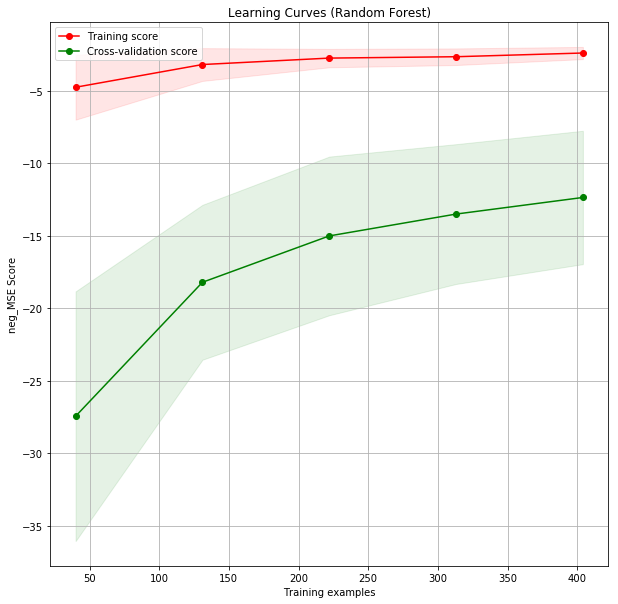

In [20]:
title = "Learning Curves (Random Forest)"
# Cross validation with 100 iterations to get smoother mean test and train score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

plot_learning_curve(regr, title, x, price, # ylim=(0.7, 1.01), 
                    cv=cv, n_jobs=4)

plt.show()

#### self-defined MSE and  self-defined CV

In [21]:
# self-defined MSE function

def MSE(x, y, model):
    predicts = model.predict(x)
    sse = []
    
    for i in range(len(predicts)):
        sse.append((y[i] - predicts[i]) **2)

    MSE = sum(sse)/len(predicts)
    return MSE

In [22]:
# split data into k folds

def cv_split(data, kfold):
    index_test = []
    index_train =[]
    fold_size = int(data.shape[0] / kfold)
    
    for i in range(kfold):
        
        index_te = random.sample(range(data.shape[0]), fold_size)
        index_tr = list(set(range(data.shape[0])) - set(index_te))
        
        index_test.append(index_te)
        index_train.append(index_tr)
    
    return index_test, index_train

In [23]:
# get cv result with MSE scores

def cv_cal(x, y, model, kfold):
    cv_MSE = []
    for i in range (kfold):
        
        index_test, index_train = cv_split(x, kfold)
        y_test = y[index_test[i]]
        x_test = x.iloc[index_test[i]]
        
        x_train = x.iloc[index_train[i]]
        y_train = y[index_train[i]]
        
        fitted = model.fit(x_train, y_train)
       
        cv_MSE.append(MSE(x_test, y_test, fitted))
        
    return cv_MSE

In [25]:
from random import seed
import random 
# seed(0)

regr = RandomForestRegressor(random_state = 0)

kf = int(x.shape[0]/2)
cv_MSE = cv_cal(x, np.ravel(price), regr, kfold = kf)

# print (cv_MSE)
sum(cv_MSE)/ kf

14.757212450592879

### metrics.mean_squared_error & training and testing set MSE

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x, price, test_size = 0.2, random_state = 0)

# build in mean_squared_error metrics on training and testing data 
eval_train = metrics.mean_squared_error(y_train, regr.predict(x_train))
print (eval_train)
# testing data 
eval_test = metrics.mean_squared_error(y_test, regr.predict(x_test))
print (eval_test)

2.04637747525
22.5201117647


In [32]:
# self-defined MSE function

def MSE(x, y, model):
    predicts = model.predict(x)
    sse = []
    
    for i in range(len(predicts)):
        sse.append((y.iloc[i] - predicts[i]) **2)

    MSE = sum(sse)/len(predicts)
    return MSE

In [33]:
# self define MSE on training and testing data 

print ('MSE from training data is {}'. format(MSE(x_train, y_train, regr)))
print ('MSE from testing data is {}'. format(MSE(x_test, y_test, regr)))

MSE from training data is 0    2.046377
dtype: float64
MSE from testing data is 0    22.520112
dtype: float64


## Tuning & Cross Validation 
### sklearn.model_selection.GridSearchCV
### self-defined gready search tuning 

In [34]:
# self-defined MSE function

def MSE(x, y, model):
    predicts = model.predict(x)
    sse = []
    
    for i in range(len(predicts)):
        sse.append((y.iloc[i] - predicts[i]) **2)

    MSE = sum(sse)/len(predicts)
    return MSE

In [35]:
def search_alpha(alphas):
    
    raw_mse = {}

    for j in alphas:

        MSE_list = []
        for i in range(5):
        # need to iterate through each fold of the splited data and train, test, calculate the averaged MSE            
            x_train, x_test, y_train, y_test =  train_test_split(data2[featurelist], data2['MKTCAP'], test_size = 0.2, random_state = 0 )
            lasso = linear_model.Lasso(alpha = j)
            lasso.fit(x_train, y_train)
            MSE_list.append(MSE(x_test, y_test, lasso))

            raw_mse[j] = MSE_list   

    return raw_mse

In [ ]:
alphas = list(np.arange(0.01, 1, 0.01) )
raw = search_alpha(alphas)

In [ ]:
mse = []
for i in raw.keys():
    mse.append(sum(raw[i])/len(raw[i]))

print (min(mse))

In [ ]:
fig = plt.figure(figsize = (10, 10))

plt.scatter(alphas, mse, marker = '*')
plt.xlabel('alpha')
plt.ylabel('mse')

plt.show()

In [ ]:

# prepare a range of alpha values to test
param_grid = {
#               "alpha":[0, 1, 0.1]
                "alpha": np.arange(0, 1, 0.01)
             }

# create and fit a lasso regression model, testing each alpha
lasso = Lasso()
# This is assumed to implement the scikit-learn estimator interface. Either estimator needs to provide a score function
# or scoring must be passed.

#### would still want to use mean squared error instead of r^2
grid = GridSearchCV(estimator = lasso, scoring = 'r2', param_grid = param_grid )
grid.fit(dataset.data, dataset.target)
print(grid)


# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)

In [ ]:
fig = plt.figure(figsize = (7, 7))

scores = grid.cv_results_['mean_test_score']
alphas = np.arange(0, 1, 0.01)
plt.scatter(alphas, scores, marker = '*')

plt.show()